In [3]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pylab as plt
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [4]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # 折扣率
        self.epsilon = 1.0  # 探索率
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        # 深度 Q 学习神经网络模型
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def select_action(self, state):
        # ε-greedy 策略选择行动
        if np.random.rand() <= self.epsilon:
            # 探索
            return random.randrange(self.action_size)
        else:
            #利用
            q_values = self.model.predict(state)
            return np.argmax(q_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def one_hot_encode(self, state, num_states):
        # 将状态编码为一热向量
        one_hot_vector = np.zeros(num_states)
        one_hot_vector[state] = 1
        return one_hot_vector


In [8]:
def Train_Agent(Agent, episodes, rewards, state_size):

    for e in range(episodes):

        # Reset the environment at the beginning of each new episode, following the termination of the previous one.
        observation = env.reset()
        state = observation[0]
        one_hot_state = Agent.one_hot_encode(state, state_size)
        state = np.reshape(one_hot_state, [1, state_size])
        terminal = False
        total_reward = 0

        for time in range(5):

            # choose next agent action
            action = Agent.select_action(state)

            # take action and observe reward
            new_state, reward, terminated, truncated, _ = env.step(action)

            one_hot_new_state = Agent.one_hot_encode(new_state, state_size)
            new_state = np.reshape(one_hot_new_state, [1, state_size])
            Agent.remember(state, action, reward, new_state, terminated)

            terminal = terminated or truncated

            # Update state
            state = new_state
            total_reward += reward

            if terminated:
                print("episode: {}/{}, score: {}, e: {:.2}".format(e, episodes, time, agent.epsilon))
                break
            if len(Agent.memory) > 32:
                Agent.replay(32)

        rewards.append(total_reward)

    env.close()
    print(f"Training completed over {episodes} episodes")


1/1 [==============================] - 0s 14ms/step
Training completed over 100 episodes


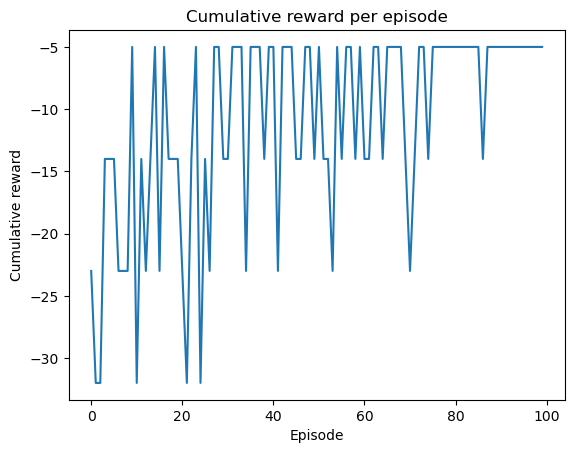

In [11]:
env = gym.make('Taxi-v3')
episodes=100
env.reset()
rewards = []
state_size = env.observation_space.n
action_size = env.action_space.n
Agent=DQNAgent(state_size, action_size)
Train_Agent(Agent,episodes, rewards, state_size)
plt.title("Cumulative reward per episode")
plt.xlabel("Episode")
plt.ylabel("Cumulative reward")
plt.plot(rewards)
plt.show()
env.close()